# Predicting Multi-MNIST digits.

The assignment consists of three tasks:

1. A multi-class classification problem: the prediction of grayscale images of double-digit numbers from a custom version of the (Multi-)MNIST dataset.

2. Unsupervised problem: the implementation of an AutoEncoder model for the encoding and reconstruction of the provided data.

3. You can choose between (one of them is mandatory, you can choose which one to do):

*   Use latent representation of autoencoder as a feature reduction
*   Explain Neural Network predictions


The dataset is created by simply concatenating pairs of MNIST digits, and the number of classes (originally all the numbers in the [0, 100] range) has been reduced.

An example of the provided dataset is the following:

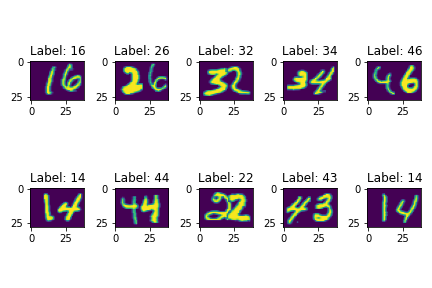

The provided data comprises the training set that can be used for the training (and for the validation) and the test set.

**General considerations**

Always describe and give proper motivations about the choices made during the assignment, including (but not limited to)

- data processing,
- network design: including number and dimension of the layers, regularization techniques (when requested).
- optimization algorithms, including hyperameters and criterions,
- model training hyperparameters
- loss/metric curves
- final evaluations and comparisons.


**Note**: Make sure that the outputs in the notebook cells are still visible once the notebook is exported (especially for html embeddings)

**Note**: Make sure that the submitted *.zip archives are not corrupted.

**Note**: convolutional layers should not be used all over this notebook (with the exception of the optional part).

## Inspecting the data

any comment about data dimensionality/distribution goes here

In [1]:
# import libraries
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [3]:
x_train.shape

# dal risultato vediamo che ci sono 72247 immagini di dimensione 28x39
# non essendoci il quarto canale con RGB le immagini potrebbero essere 
# bianco e nero

(72247, 28, 39)

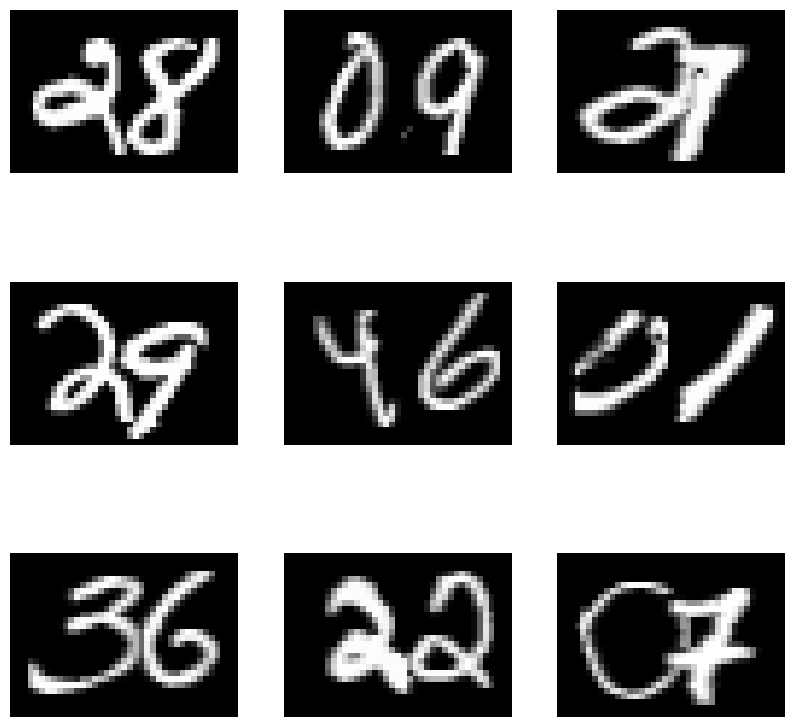

In [4]:
# Definisci il numero di immagini da visualizzare
num_images = 9  # Ad esempio, visualizziamo 9 immagini

# Imposta una griglia quadrata per la visualizzazione (3x3 per 9 immagini)
plt.figure(figsize=(10, 10))

# Loop per visualizzare le prime 'num_images' immagini
for i in range(num_images):
    # Crea un sottografico per ogni immagine
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')  # cmap='gray' per immagini in scala di grigi
    plt.axis('off')  # Nascondi gli assi per una visualizzazione pulita

plt.show()


In [5]:
print('Number of categories:',len(set(y_train)))

Number of categories: 50


In [6]:
# check datatype and range
# Controlla il tipo di dati di x_train e x_test
print("Tipo di dati di x_train:", x_train.dtype)
print("Tipo di dati di x_test:", x_test.dtype)

# Esempio di valori massimi e minimi prima della normalizzazione
print("Valore minimo di x_train:", x_train.min())
print("Valore massimo di x_train:", x_train.max())

Tipo di dati di x_train: uint8
Tipo di dati di x_test: uint8
Valore minimo di x_train: 0
Valore massimo di x_train: 255


In [7]:
# Calculate mean and standard deviation
mean_pixel = x_train.mean()
std_pixel = x_test.std()
print("Mean pixel value:", mean_pixel)
print("Standard deviation of pixel values:", std_pixel)

Mean pixel value: 45.94367316213898
Standard deviation of pixel values: 86.22925981989721


In [8]:
# Controllo delle immagini bianche e nere
white_images = []  # Indici delle immagini completamente bianche
black_images = []  # Indici delle immagini completamente nere

# Verifica di ogni immagine nel dataset
for i in range(x_train.shape[0]):
    if np.all(x_train[i] == 1.0):  # Immagine completamente bianca
        white_images.append(i)
    elif np.all(x_train[i] == 0.0):  # Immagine completamente nera
        black_images.append(i)

# Stampa i risultati
print(f"Numero di immagini completamente bianche: {len(white_images)}")
print(f"Numero di immagini completamente nere: {len(black_images)}")

# Visualizza alcune immagini bianche e nere come esempio
num_images_to_show = 5  # Mostra 5 immagini bianche e nere

# Visualizza le immagini bianche
plt.figure(figsize=(10, 5))
for i in range(min(num_images_to_show, len(white_images))):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_train[white_images[i]], cmap='gray')
    plt.title("Immagine Bianca")
    plt.axis('off')
plt.show()

# Visualizza le immagini nere
plt.figure(figsize=(10, 5))
for i in range(min(num_images_to_show, len(black_images))):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_train[black_images[i]], cmap='gray')
    plt.title("Immagine Nera")
    plt.axis('off')
plt.show()


Numero di immagini completamente bianche: 0
Numero di immagini completamente nere: 0


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

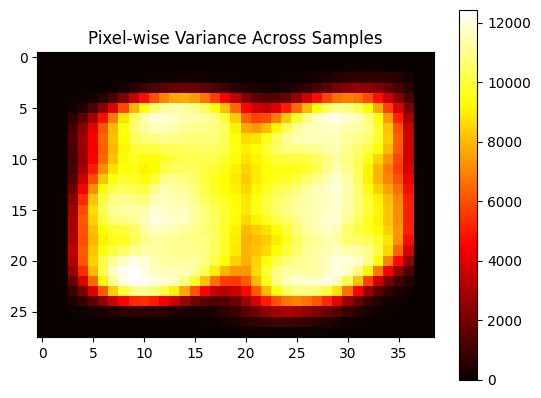

In [9]:
# Compute pixel-wise variance
pixel_variance = x_train.var(axis=0)

# Plot the pixel-wise variance
plt.imshow(pixel_variance, cmap='hot')
plt.colorbar()
plt.title("Pixel-wise Variance Across Samples")
plt.show()

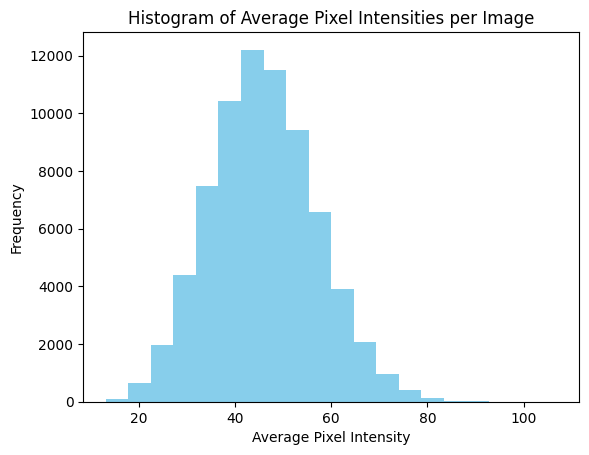

In [10]:
# Calculate average pixel intensity per image
avg_intensity_per_image = x_train.mean(axis=(1, 2))

# Plot histogram of average intensities
plt.hist(avg_intensity_per_image, bins=20, color='skyblue')
plt.title("Histogram of Average Pixel Intensities per Image")
plt.xlabel("Average Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

C:\Users\lperf\AppData\Local\Temp\ipykernel_10900\4290464859.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


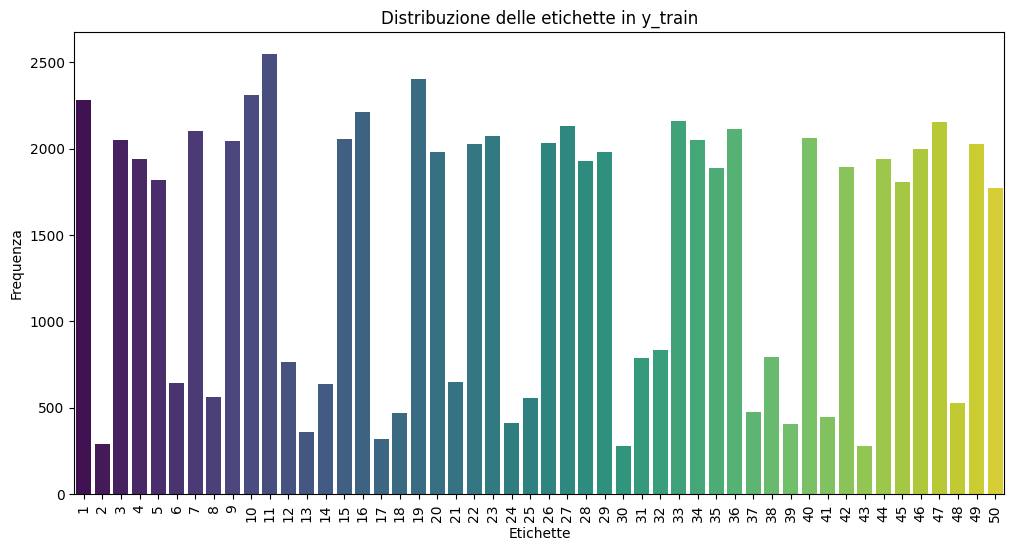

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crea il grafico della distribuzione per y_train
plt.figure(figsize=(12, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribuzione delle etichette in y_train')
plt.xlabel('Etichette')
plt.ylabel('Frequenza')
plt.xticks(rotation=90)  # Ruota le etichette sull'asse X se sono troppo fitte
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Supponiamo che `y_train` contenga le etichette delle classi per ciascuna immagine
unique, counts = np.unique(y_train, return_counts=True)

# Visualizza il conteggio delle immagini per ciascuna classe
class_distribution = dict(zip(unique, counts))
print("Distribuzione delle classi:", class_distribution)


Distribuzione delle classi: {1: 2282, 2: 292, 3: 2049, 4: 1941, 5: 1819, 6: 641, 7: 2102, 8: 560, 9: 2046, 10: 2311, 11: 2548, 12: 766, 13: 358, 14: 634, 15: 2055, 16: 2214, 17: 318, 18: 471, 19: 2403, 20: 1982, 21: 646, 22: 2029, 23: 2073, 24: 413, 25: 555, 26: 2034, 27: 2132, 28: 1926, 29: 1979, 30: 276, 31: 787, 32: 832, 33: 2159, 34: 2050, 35: 1885, 36: 2111, 37: 477, 38: 792, 39: 406, 40: 2060, 41: 444, 42: 1894, 43: 279, 44: 1940, 45: 1807, 46: 1995, 47: 2153, 48: 526, 49: 2025, 50: 1770}


## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
print('Size of the train set:', x_train.shape)
print('Size of the test set:', x_test.shape)

Size of the train set: (72247, 28, 39)
Size of the test set: (24083, 28, 39)


In [15]:
x_train = x_train.reshape(72247, 28 * 39)
x_test = x_test.reshape(24083, 28 * 39)

In [16]:
# Normalizzazione: se le immagini hanno valori tra 0 e 255, dividi per 255
x_train = x_train / 255
x_test = x_test / 255

#normalizziamo perchè così rendiamo i valori tra 0 e 255 li abbiamo scalati
# a 0 e 1 dividendo per 255, rendendo l'addestrametno del modello più stabile
# e efficiente

In [17]:
#import numpy as np

# Distribuzione delle etichette nel training set
#unique_train, counts_train = np.unique(y_train, return_counts=True)
#print("Distribuzione nel training set:", dict(zip(unique_train, counts_train)))

# Distribuzione delle etichette nel test set
#unique_test, counts_test = np.unique(y_test, return_counts=True)
#print("Distribuzione nel test set:", dict(zip(unique_test, counts_test)))


36

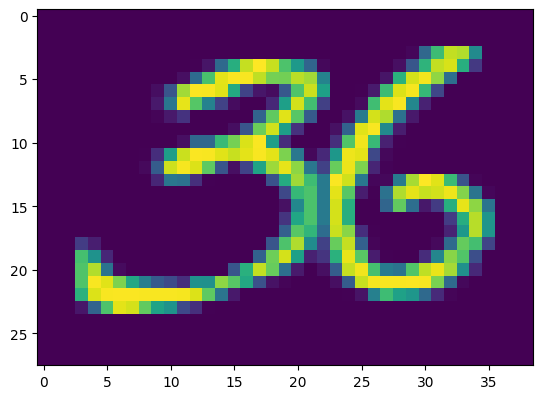

In [18]:
plt.imshow(x_train[6].reshape(28, 39))
y_train[6]

In [19]:
print(np.asarray(range(10)))
print(y_train[6].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
36


7

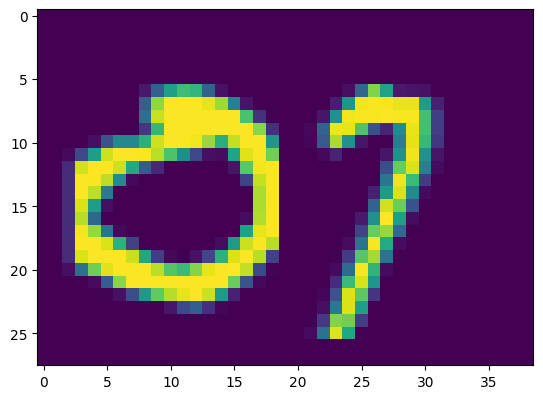

In [20]:
plt.imshow(x_test[0].reshape(28, 39))
y_test[0]
# forse

In [21]:
print(np.asarray(range(10)))
print(y_test[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
7


# 1. The resolution of the problem of supervised classification with traditional fully-connected neural networks. [Mandatory]





You are required to implement two models, without and with the use of one (or more) regularization technique of your choice, and to compare their behaviours, in terms of training dynamics and generalization capabilities.

## 1.1 Non-regularized Model

In this section, you are required to attempt to solve the classification task with the implementation and training of a standard fully-connected Neural Network, without the use of any specific regularization technique.

### 1.1.1 Building the network


any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. loss/optimizer choice, final activations, loss functions, training metrics and training hyperparameters)

In [22]:
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential
from keras.optimizers import SGD, Adam

dims = x_train.shape[1]

nb_classes = 51

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(nb_classes, activation = "softmax"))

#model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       559,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 51)             │         3,315 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 735,411 (2.81 MB)

 Trainable params: 735,411 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
n_epochs = 30
network_history = model.fit(
    x_train, y_train, batch_size=50,
                    epochs=n_epochs, validation_split=0.2)

Epoch 1/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2254 - loss: 3.1955 - val_accuracy: 0.6862 - val_loss: 1.1284
Epoch 2/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7146 - loss: 1.0063 - val_accuracy: 0.7650 - val_loss: 0.8164
Epoch 3/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7876 - loss: 0.7401 - val_accuracy: 0.8091 - val_loss: 0.6827
Epoch 4/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8202 - loss: 0.6274 - val_accuracy: 0.8289 - val_loss: 0.6051
Epoch 5/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8438 - loss: 0.5436 - val_accuracy: 0.8465 - val_loss: 0.5300
Epoch 6/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8613 - loss: 0.4775 - val_accuracy: 0.8552 - val_loss: 0.4934
Epoch 7/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8809 - loss: 0.4050 - val_accuracy: 0.8601 - val_loss: 0.4660
Epoch 8/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8925 - loss: 0.3641 - 

### 1.1.2 Analyze and comment on the training results

Describe, visualize and interpret the training history and the resulting training dynamics.

andiamo a stampare i grafici e il classification report

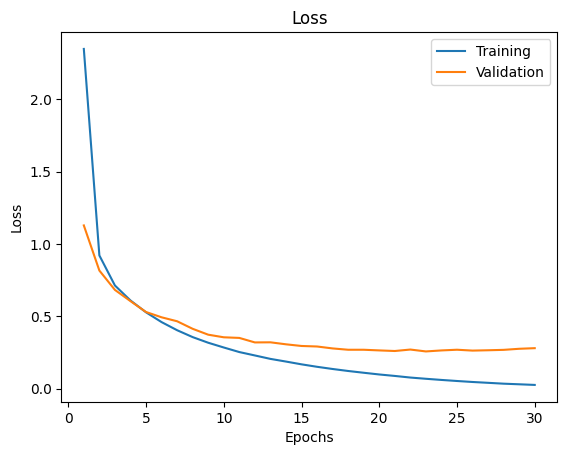

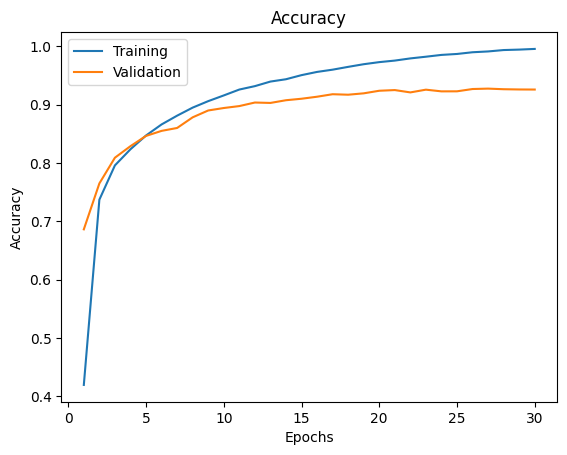

In [25]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

plot_loss(network_history)
plot_accuracy(network_history)

### 1.1.3 Validate the model and comment on the results

please describe and interpret the evaluation procedure on a **validation set**, including initial comments on the generalization capability of your model (e.g. under/overfitting).

In [26]:
from sklearn.metrics import classification_report
import numpy as np

# Supponiamo che il modello sia già addestrato come da codice che hai fornito

# Step 1: Ottieni le predizioni per il set di test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converte le predizioni in etichette

# Step 2: Genera il classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))

753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       801
           2       0.74      0.83      0.78        77
           3       0.95      0.92      0.94       638
           4       0.95      0.95      0.95       676
           5       0.94      0.93      0.93       606
           6       0.89      0.96      0.92       188
           7       0.90      0.95      0.92       697
           8       0.82      0.84      0.83       185
           9       0.94      0.88      0.91       667
          10       0.95      0.97      0.96       771
          11       0.99      0.98      0.98       876
          12       0.91      0.93      0.92       261
          13       0.80      0.90      0.85        82
          14       0.93      0.88      0.91       202
          15       0.96      0.95      0.95       687
          16       0.96      0.98      0.97       751
          17       0.91      0.87      0

In [27]:
# Step 3: Estrai le medie per le varie metriche
print("\nMedie per classe:")
print(f"Precision (macro avg): {report['macro avg']['precision']:.4f}")
print(f"Recall (macro avg): {report['macro avg']['recall']:.4f}")
print(f"F1-Score (macro avg): {report['macro avg']['f1-score']:.4f}")

print("\nMedia ponderata:")
print(f"Precision (weighted avg): {report['weighted avg']['precision']:.4f}")
print(f"Recall (weighted avg): {report['weighted avg']['recall']:.4f}")
print(f"F1-Score (weighted avg): {report['weighted avg']['f1-score']:.4f}")


Medie per classe:
Precision (macro avg): 0.9137
Recall (macro avg): 0.9112
F1-Score (macro avg): 0.9120

Media ponderata:
Precision (weighted avg): 0.9317
Recall (weighted avg): 0.9314
F1-Score (weighted avg): 0.9313


- Macro Average: Calcola la media aritmetica delle metriche considerando ogni classe in modo uguale, senza tener conto del numero di esempi per ciascuna classe. È utile quando hai un dataset sbilanciato e vuoi valutare come il modello si comporta in media su tutte le classi, indipendentemente dalla loro frequenza.

- Weighted Average: Calcola una media ponderata delle metriche, tenendo conto della frequenza di ciascuna classe nel dataset. È utile quando hai un dataset sbilanciato e vuoi dare più peso alle classi più frequenti per avere una stima delle performance complessive.

In [28]:
# Valuta il modello sul set di test
loss, accuracy = model.evaluate(x_test, y_test)

# Stampa l'accuratezza
print("Accuratezza complessiva sul set di test:", accuracy)


753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9299 - loss: 0.2701
Accuratezza complessiva sul set di test: 0.9313623905181885


## 1.2 Regularized Model

Replicate the structure of section 1.1 (including subsections 1.1.1, 1.1.2, 1.1.3 and guidelines), this time with the implementation and training of a regularized network.

Implement _at least_ one regularization technique of your choice.

The overall model architecture can be either identical or different with respect to the one presented in sec 1.1 (your choice).

In [35]:
from tensorflow.keras import regularizers

dims = x_train.shape[1]
nb_classes = 51
dropout_rate = 0.1
a_lambda = 0.01

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(512, activation = "relu", kernel_regularizer=regularizers.l2(a_lambda), bias_regularizer=regularizers.l2(a_lambda)))

model2.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(a_lambda), bias_regularizer=regularizers.l2(a_lambda)))

model2.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(a_lambda), bias_regularizer=regularizers.l2(a_lambda)))

model2.add(Dense(64, activation = "relu", kernel_regularizer=regularizers.l2(a_lambda), bias_regularizer=regularizers.l2(a_lambda)))

model2.add(Dense(nb_classes, activation = "softmax"))

#model2.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer=SGD(learning_rate=0.01), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

n_epochs = 30
network_history2 = model2.fit(
    x_train, y_train, batch_size=50,
                    epochs=n_epochs, validation_split=0.2)

Epoch 1/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1916 - loss: 14.9802 - val_accuracy: 0.6310 - val_loss: 9.8501
Epoch 2/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6637 - loss: 8.9051 - val_accuracy: 0.7238 - val_loss: 6.6232
Epoch 3/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7277 - loss: 6.0771 - val_accuracy: 0.7544 - val_loss: 4.7056
Epoch 4/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7590 - loss: 4.3490 - val_accuracy: 0.7545 - val_loss: 3.5180
Epoch 5/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7717 - loss: 3.2651 - val_accuracy: 0.7833 - val_loss: 2.7222
Epoch 6/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7833 - loss: 2.5683 - val_accuracy: 0.7918 - val_loss: 2.2336
Epoch 7/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7884 - loss: 2.1321 - val_accuracy: 0.7913 - val_loss: 1.9259
Epoch 8/30
1156/1156 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7978 - loss: 1.8421 -

### 1.2.2 Analyze and comment the training results

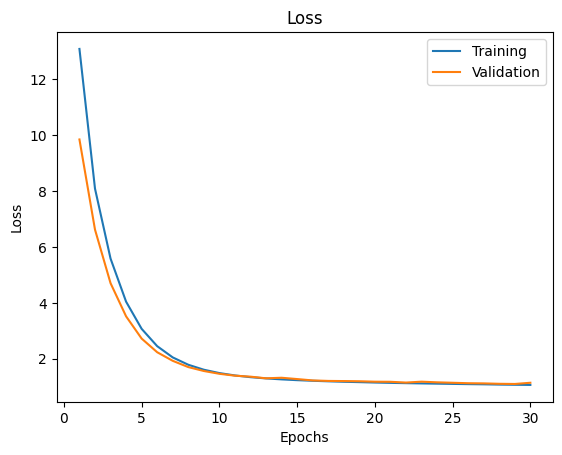

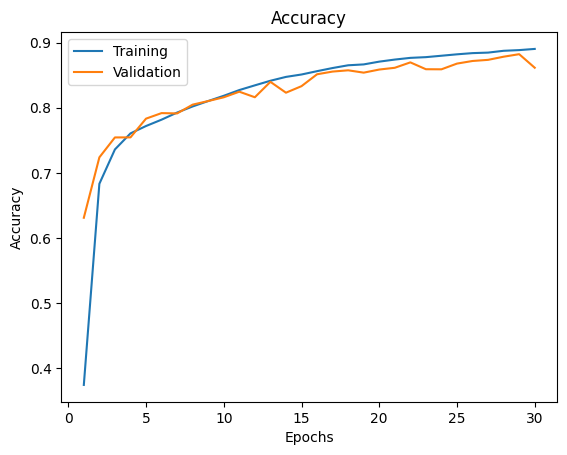

In [36]:
plot_loss(network_history2)
plot_accuracy(network_history2)

### 1.2.3 Validate the model and comment on the results

In [37]:
from sklearn.metrics import classification_report
import numpy as np

# Supponiamo che il modello sia già addestrato come da codice che hai fornito

# Step 1: Ottieni le predizioni per il set di test
y_pred = model2.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Converte le predizioni in etichette

# Step 2: Genera il classification report
report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))


753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           1       0.92      0.95      0.94       801
           2       0.92      0.47      0.62        77
           3       0.76      0.92      0.83       638
           4       0.95      0.84      0.89       676
           5       0.94      0.82      0.88       606
           6       0.95      0.87      0.91       188
           7       0.81      0.93      0.87       697
           8       0.93      0.53      0.68       185
           9       0.78      0.83      0.80       667
          10       0.93      0.94      0.93       771
          11       0.94      0.97      0.96       876
          12       0.92      0.82      0.87       261
          13       0.69      0.83      0.76        82
          14       0.87      0.76      0.81       202
          15       0.90      0.92      0.91       687
          16       0.94      0.94      0.94       751
          17       0.84      0.74      0

In [38]:
print("\nMedie per classe:")
print(f"Precision (macro avg): {report['macro avg']['precision']:.4f}")
print(f"Recall (macro avg): {report['macro avg']['recall']:.4f}")
print(f"F1-Score (macro avg): {report['macro avg']['f1-score']:.4f}")

print("\nMedia ponderata:")
print(f"Precision (weighted avg): {report['weighted avg']['precision']:.4f}")
print(f"Recall (weighted avg): {report['weighted avg']['recall']:.4f}")
print(f"F1-Score (weighted avg): {report['weighted avg']['f1-score']:.4f}")


Medie per classe:
Precision (macro avg): 0.8592
Recall (macro avg): 0.8029
F1-Score (macro avg): 0.8203

Media ponderata:
Precision (weighted avg): 0.8687
Recall (weighted avg): 0.8619
F1-Score (weighted avg): 0.8605


Macro Average: Calcola la media aritmetica delle metriche considerando ogni classe in modo uguale, senza tener conto del numero di esempi per ciascuna classe. È utile quando hai un dataset sbilanciato e vuoi valutare come il modello si comporta in media su tutte le classi, indipendentemente dalla loro frequenza.

Weighted Average: Calcola una media ponderata delle metriche, tenendo conto della frequenza di ciascuna classe nel dataset. È utile quando hai un dataset sbilanciato e vuoi dare più peso alle classi più frequenti per avere una stima delle performance complessive.

In [39]:
# Valuta il modello sul set di test
loss, accuracy = model2.evaluate(x_test, y_test)

# Stampa l'accuratezza
print("Accuratezza complessiva sul set di test:", accuracy)

753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8607 - loss: 1.1376
Accuratezza complessiva sul set di test: 0.8619357943534851


## 1.3. Compare the performances of the two models (non-regularized and regularized) on the provided test set, visualize and comment on theresults

Visualize, describe and interpret the evaluation procedure and results on the provided test set, with a focus on the generalization capability of your models.



In [40]:
# Valutazione del modello senza regolarizzazione
test_loss_no_reg, test_acc_no_reg = model.evaluate(x_test, y_test, verbose=0)
print("Modello senza regolarizzazione - Test Loss:", test_loss_no_reg)
print("Modello senza regolarizzazione - Test Accuracy:", test_acc_no_reg)

# Valutazione del modello con regolarizzazione
test_loss_with_reg, test_acc_with_reg = model2.evaluate(x_test, y_test, verbose=0)
print("Modello con regolarizzazione - Test Loss:", test_loss_with_reg)
print("Modello con regolarizzazione - Test Accuracy:", test_acc_with_reg)

Modello senza regolarizzazione - Test Loss: 0.2596808671951294
Modello senza regolarizzazione - Test Accuracy: 0.9313623905181885
Modello con regolarizzazione - Test Loss: 1.1306867599487305
Modello con regolarizzazione - Test Accuracy: 0.8619357943534851


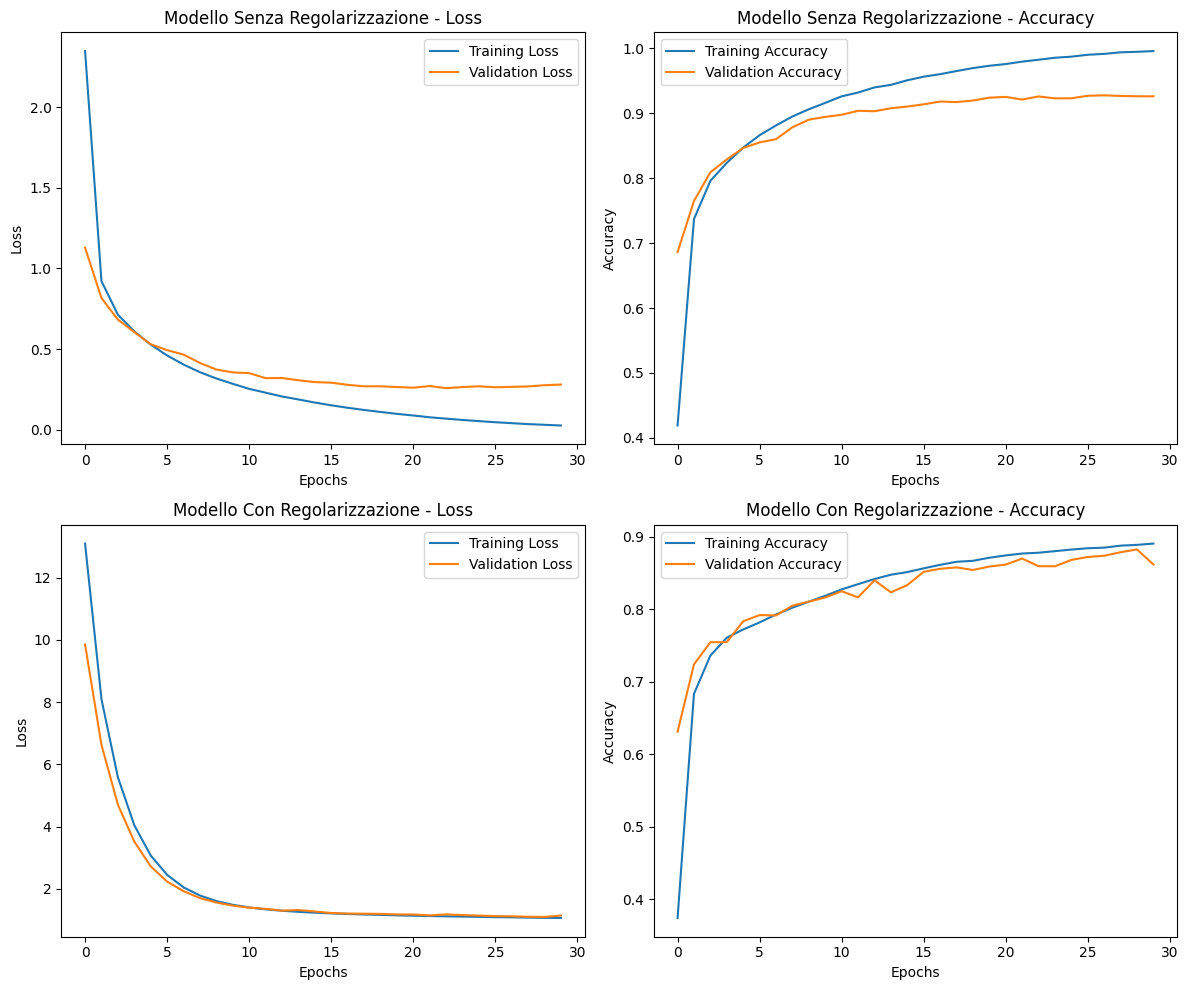

In [41]:
import matplotlib.pyplot as plt

# Crea una figura con 2 righe e 2 colonne
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Prima riga, primo grafico: Loss del modello senza regolarizzazione
axs[0, 0].plot(network_history.history['loss'], label='Training Loss')
axs[0, 0].plot(network_history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title("Modello Senza Regolarizzazione - Loss")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].legend()

# Prima riga, secondo grafico: Accuracy del modello senza regolarizzazione
axs[0, 1].plot(network_history.history['accuracy'], label='Training Accuracy')
axs[0, 1].plot(network_history.history['val_accuracy'], label='Validation Accuracy')
axs[0, 1].set_title("Modello Senza Regolarizzazione - Accuracy")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].legend()

# Seconda riga, primo grafico: Loss del modello con regolarizzazione
axs[1, 0].plot(network_history2.history['loss'], label='Training Loss')
axs[1, 0].plot(network_history2.history['val_loss'], label='Validation Loss')
axs[1, 0].set_title("Modello Con Regolarizzazione - Loss")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Loss")
axs[1, 0].legend()

# Seconda riga, secondo grafico: Accuracy del modello con regolarizzazione
axs[1, 1].plot(network_history2.history['accuracy'], label='Training Accuracy')
axs[1, 1].plot(network_history2.history['val_accuracy'], label='Validation Accuracy')
axs[1, 1].set_title("Modello Con Regolarizzazione - Accuracy")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].legend()

# Aggiusta spazi tra i grafici per una visualizzazione più chiara
plt.tight_layout()
plt.show()

Based on the results obtained and analyzed during the training and the validation phases, what were your (rather _personal_) expectations with respect to the performances of your models on a blind external test set?

What are the differences between results on the validation set and the actual result on the test set (if any)? What could have caused them? Briefly motivate your answer.

After the comparison, what is the overall "best" model? Why?

For the model that you consider the "best", what are the major sources of error? Are there any classes/labels (or data samples in general) where the model is struggling the most? Why?

# 2. The development of a simple auto-encoder model  [Mandatory]
Implement a fully-connected AutoEncoder architecuture, with a **compression factor** (ratio between input size and smallest encoding size) in the **range [20-30]**.


Visually investigate the reconstruction abilities of such an architecture, e.g. comparing a few inputs and outputs (reconstructed inputs) of the model (as seen in class).

## 2.1 Building the network

note: although not strictly required, monitoring the training dynamics and performance evaluation is suggested for the autoencoder model.

The functional api allows to create **submodels**.

Here we will instanciate two submodels, one responisble for the encoding  section of the AE (**encoder**), and the other for the decoding section (**decoder**).

In [42]:
x_train.shape

(72247, 1092)

In [43]:
from tensorflow.keras.models import Model
# this is the size of our encoded representations
input_dim = 1092 #28x39
encoding_dim = 48
activation = "relu"

# this is our input placeholder
input = Input(shape=(input_dim,)) 

# hiddent layers
downsampling_hidden_1 = Dense(256, activation = activation, name = "downsampling_hidden_1")(input)

downsampling_hidden_2 = Dense(64, activation = activation, name = "downsampling_hidden_2")(downsampling_hidden_1)

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation=activation, name = "latent")(downsampling_hidden_2)

upsampling_hidden_1 = Dense(64, activation = activation, name = "upsampling_hidden_1")(encoded)

upsampling_hidden_2 = Dense(256, activation = activation, name = "upsampling_hidden_2")(upsampling_hidden_1)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation='sigmoid', name = "decoder")(upsampling_hidden_2)

# this model maps an input to its reconstruction
autoencoder = Model(input, decoded)

autoencoder.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1092)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ downsampling_hidden_1 (Dense)   │ (None, 256)            │       279,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ downsampling_hidden_2 (Dense)   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling_hidden_1 (Dense)     │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling_hidden_2 (Dense)     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Dense)                 │ (None, 1092)           │       280,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 599,796 (2.29 MB)

 Trainable params: 599,796 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# this model maps an input to its encoded representation
encoder_model = Model(input, encoded)
encoder_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1092)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ downsampling_hidden_1 (Dense)   │ (None, 256)            │       279,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ downsampling_hidden_2 (Dense)   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 48)             │         3,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,376 (1.14 MB)

 Trainable params: 299,376 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# SUBMODEL for the decoder
decoder_model = Model(encoded, decoded)
decoder_model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_42CLONE            │ (None, 48)             │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling_hidden_1 (Dense)     │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling_hidden_2 (Dense)     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Dense)                 │ (None, 1092)           │       280,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,420 (1.15 MB)

 Trainable params: 300,420 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# da vedere binary_cross entropy
autoencoder.compile(optimizer="adam", loss='binary_crossentropy', metrics = ["mse"])
autoencoder.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1092)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ downsampling_hidden_1 (Dense)   │ (None, 256)            │       279,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ downsampling_hidden_2 (Dense)   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent (Dense)                  │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling_hidden_1 (Dense)     │ (None, 64)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ upsampling_hidden_2 (Dense)     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Dense)                 │ (None, 1092)           │       280,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 599,796 (2.29 MB)

 Trainable params: 599,796 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#note: X_train, X_train :)
#also note: "encoder_model" and "decoder_model" are just "pointers" to the autoencoder main model. This means that when the AE is trained, the encoder and the decoder will point to the trained weights.
network_history_a = autoencoder.fit(x_train,x_train,
                epochs=100,
                batch_size=1024,
                shuffle=True,
                validation_split=0.1
                )

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.4965 - mse: 0.1355 - val_loss: 0.3392 - val_mse: 0.0791
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3231 - mse: 0.0735 - val_loss: 0.2819 - val_mse: 0.0596
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2737 - mse: 0.0566 - val_loss: 0.2519 - val_mse: 0.0490
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2478 - mse: 0.0474 - val_loss: 0.2360 - val_mse: 0.0433
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.2339 - mse: 0.0426 - val_loss: 0.2283 - val_mse: 0.0410
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.2258 - mse: 0.0398 - val_loss: 0.2185 - val_mse: 0.0373
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2174 - mse: 0.0369 - val_loss: 0.2125 - val_mse: 0.0352
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2118 - mse: 0.0350 - val_loss: 0.2080 - val_mse: 0.0337
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - lo

## 2.2 Visually Inspecting the results

Investigate the reconstruction capabilities of autoencoders by comparing (in a multi-column plot) the visual representation of some input data (5 to 10 samples) with the reconstruction of such samples (output of the autoencoder).

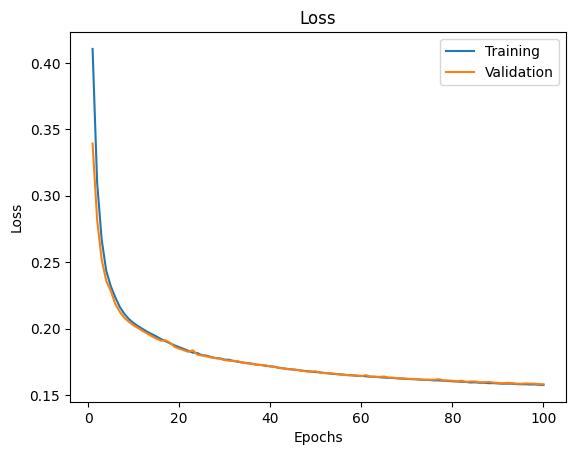

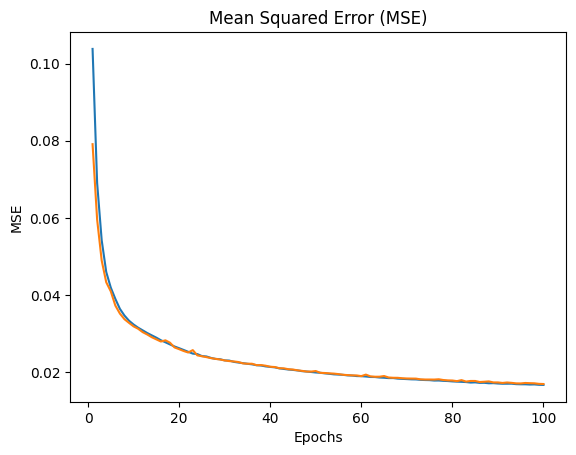

In [54]:
def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_mse(history):
  x_plot = list(range(1,len(history.history["mse"])+1))
  plt.figure()
  plt.title("Mean Squared Error (MSE)")
  plt.xlabel('Epochs')
  plt.ylabel('MSE')
  plt.plot(x_plot, history.history['mse'], label='Training MSE')
  plt.plot(x_plot, history.history['val_mse'], label='Validation MSE')
  #plt.legend(['Training', 'Validation'])

plot_loss(network_history_a)
plot_mse(network_history_a)

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


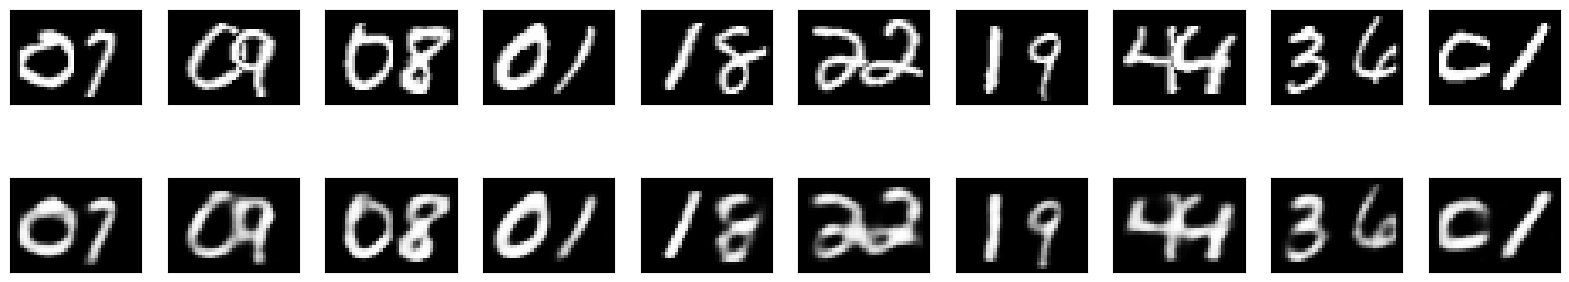

In [55]:
## Testing
x_selected = x_test
encoded_imgs = encoder_model.predict(x_selected)
decoded_imgs = decoder_model.predict(encoded_imgs)

#autoencoder.predict(x_selected)
#alternative here?
#decoded_imgs = autoencoder.predict(x_selected)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_selected[i].reshape(28, 39))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 39))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred = autoencoder.predict(x_selected)

print(mean_absolute_error(x_test, pred))
print(mean_squared_error(x_test, pred))

753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
0.056672197672158885
0.016969941955262496


- MAE misua quanto in media le ricostruzini differicono dai dati originale. Un valore di 0.057 significa che, mediamente, i valori di ciascun pixel differiscono di circa 5.7% dai valori originali (assumendo che i dati siano normalizzati tra 0 e 1).
In generale, più basso è il MAE, migliore è la qualità della ricostruzione. Quindi, questo è un valore piuttosto buono. 
- L'MSE misura la media degli errori al quadrato tra le ricostruzioni e i dati originali. Poiché gli errori sono elevati al quadrato, l'MSE penalizza errori più grandi.
Un valore di 0.017 significa che, in media, l'errore quadratico è di circa 1.7%. Più basso è maggiore è la qualità della ricostruzione. 
- Questi risultati suggeriscono che il tuo autoencoder sta ricostruendo abbastanza bene i dati. Un MAE di 0.057 e un MSE di 0.017 indicano un errore contenuto, anche se c'è sempre spazio per migliorare a seconda delle tue specifiche esigenze

## 2.3 Generate new samples

Starting from random encodings, generate $N$ ($N \in [10,20]$) new samples, and make some comments about the quality and distribution of the generated samples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


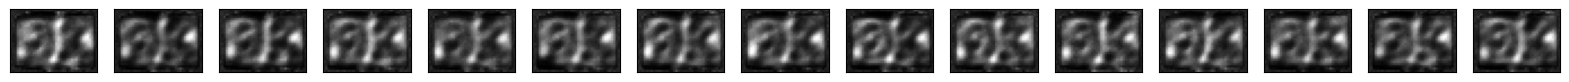

In [58]:
n = 15

random_encodings = np.random.rand(20,encoding_dim)
decoded_imgs = decoder_model.predict(random_encodings)

plt.figure(figsize=(20, 4))
for i in range(n):
    # generation
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 39))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3.A [OPTIONAL] The use and evaluation of the latent (encoded) representations generated by the auto-encoder to solve the problem of supervised classification.

1. Obtain `X_train_encoded`, `X_test_encoded`, the latent (encoded) representations of `X_train` and `X_test` generated by the (encoder module of the) autoencoder developed in Section 2.

2. With the use of any classic machine learning method of your choice (avoid NNs), classify letters as in Sec.1 based on this representation.

3. Apply the same type of ML algorithm chosen in pt.2, but directly on the original data `X_train`, `X_test` (or you can use suitable dimensionality reduction methods if the chosen algorithm is known to require them or benefit from them).  

4. Compare (briefly) the performances on the test set, between the best model of Sec.1, the ML model trained on `X_train_encoded` and the ML model trained on `X_train` (or any other suitable representation that you choose in pt.3).


In other words, instead of feeding images directly through a classifier, you can try to use the encoded representations from the AE as input for a classic ML algorithm (XGB, SVM, RF ...) to solve the classification task.


In [59]:
# Ottieni le rappresentazioni latenti di X_train e X_test usando il modello encoder
x_train_encoded = encoder_model.predict(x_train)
x_test_encoded = encoder_model.predict(x_test)
print(x_train_encoded)
print(x_test_encoded)

2258/2258 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[13.243012 14.112591  0.       ...  9.114517 14.381201  0.      ]
 [10.081717 14.712799  0.       ... 18.860289  9.980343  0.      ]
 [10.821552 23.762209  0.       ... 12.022102 12.527978  0.      ]
 ...
 [ 9.569226 26.226488  0.       ... 19.973915 18.370918  0.      ]
 [11.665287 13.880871  0.       ... 16.413143 15.277569  0.      ]
 [ 9.688739 20.682646  0.       ...  4.486791  9.010268  0.      ]]
[[ 7.828449  16.285368   0.        ... 18.148748  13.885709   0.       ]
 [ 9.927241  19.601456   0.        ... 16.987822  10.199364   0.       ]
 [12.237174  24.579165   0.        ... 27.903093  16.816488   0.       ]
 ...
 [ 6.798853  17.294037   0.        ...  6.8747277  8.019522   0.       ]
 [10.069694  21.501562   0.        ... 19.948233  14.32959    0.       ]
 [ 8.961024  16.220158   0.        ... 10.797129   7.769813   0.       ]]


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Inizializza e addestra il classificatore
rf_model_encoded = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_encoded.fit(x_train_encoded, y_train)

# Fai previsioni su X_test_encoded e valuta le prestazioni
y_pred_encoded = rf_model_encoded.predict(x_test_encoded)
print("Classification Report for Encoded Data:")
print(classification_report(y_test, y_pred_encoded))

Classification Report for Encoded Data:
              precision    recall  f1-score   support

           1       0.74      0.93      0.83       801
           2       0.67      0.05      0.10        77
           3       0.66      0.77      0.71       638
           4       0.69      0.78      0.73       676
           5       0.68      0.68      0.68       606
           6       0.83      0.52      0.64       188
           7       0.72      0.75      0.73       697
           8       0.77      0.19      0.31       185
           9       0.65      0.68      0.66       667
          10       0.82      0.92      0.87       771
          11       0.87      0.96      0.91       876
          12       0.90      0.53      0.67       261
          13       0.93      0.17      0.29        82
          14       0.85      0.35      0.49       202
          15       0.73      0.85      0.78       687
          16       0.83      0.94      0.88       751
          17       1.00      0.29      0.

# 3.B [OPTIONAL] Explain model's predictions

Take the networks defined in (1) and try to explain the predictions of the model.

*   Include at least one model-agnostic method and one model-specific method;
*   Compare the two investigated XAI methods;
*   Compare the results on the original and regularized model for a single XAI method;

### 3.B.1 XAI method definition

Describe the design choices made at this stage: why did you choose these two methods?

### 3.B.2 Result's comparison

Compare the results of both XAI methods and the results of applying the same method to different models.